In [1]:
%load_ext autoreload

In [29]:
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('..')
from data_utils import *

In [16]:
session = "SPOCK_Ketamine_20210715"
all_data_dir = "/scratch2/weka/millerlab/eisenaj/datasets/anesthesia/mat/"

In [17]:
data_class = get_data_class(session, all_data_dir)

In [19]:
variables = ['electrodeInfo', 'lfp', 'sessionInfo', 'trialInfo']
session_vars, T, N, dt = load_session_data(session, all_data_dir, variables, data_class=data_class)

Loading data: ['electrodeInfo', 'lfp', 'sessionInfo', 'trialInfo', 'lfpSchema']...
electrodeInfo : dict with keys[Properties,area,array,channel,chnlID,electrode,file,gridLoc,hasLFP,hemisphere,numUnits,session,]

lfp : numpy.array(21141618,128,) of type float64

sessionInfo : dict with keys[Properties,date,experiment,infusionEnds,infusionStarts,numCorrect,numtrials,pctCorrect,session,subject,tasks,]

trialInfo : dict with keys[EarlyResponse,Properties,blockNum,condition,correct,frameSkipped,lvr_correctReward,lvr_expectedDir,lvr_initiation,lvr_initiationTime,lvr_startTone,manualReward,noResponse,odd_blockStd,odd_blockType,odd_globalOddball,odd_localOddball,odd_sequence,odd_sequenceStart,odd_subblockType,outcome,refEvent,session,task,trial,trialEnd,trialStart,]

lfpSchema : dict with keys[dataDim,dataUnits,description,dims,history,index,indexUnits,mask,smpInterval,smpRate,timeUnits,userData,]

Data loaded (took 147.39 seconds)


In [20]:
electrode_info, lfp, session_info, trial_info = session_vars['electrodeInfo'], session_vars['lfp'], session_vars['sessionInfo'], session_vars['trialInfo']

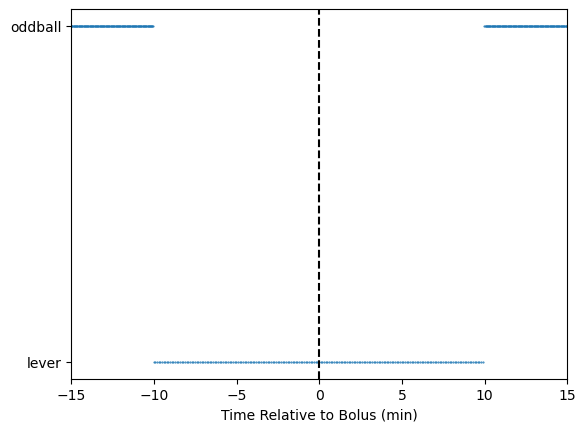

In [46]:
trial_indicator = np.zeros(len(trial_info['trialStart']))
trial_indicator[trial_info['task'] == 'oddball'] = 1

plt.scatter((trial_info['trialStart'] - session_info['infusionStarts'])/60, trial_indicator, s=0.23)
plt.xlabel('Time Relative to Bolus (min)')
plt.yticks([0, 1], ['lever', 'oddball'])
plt.axvline(0, linestyle='--', c='k')
plt.xlim([-15, 15])
plt.show()